<a href="https://colab.research.google.com/github/muhammadefan/just_do_it/blob/main/Classification%20%5BImage%20-%20Computer%20Vision%5D%3A%20Number%20Plate%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

by Muhammad Efan Abdulfattah

inspired from:
1. https://github.com/nicknochnack/ 
2. https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/auto_examples/object_detection_camera.html

###Data Preparation

#### **gathering some dependencies**

In [14]:
# installing object detection package

!git clone --quiet https://github.com/tensorflow/models.git # clone object detection models from tensorflow

!apt-get install -y -qq protobuf-compiler python-pil python-lxml # install protobuf

!pip install -q pycocotools

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

fatal: destination path 'models' already exists and is not an empty directory.
/content/models/research


In [15]:
!mkdir '/content/pre-trained-models/' # make a directory named 'pre-trained-models' for saving below files

!wget 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz' # download pretrained model

!mv {'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'} {'/content/pre-trained-models/'}

!cd {'/content/pre-trained-models/'} && tar -zxvf {'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'}

mkdir: cannot create directory ‘/content/pre-trained-models/’: File exists
--2021-05-19 14:24:29--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.97.128, 2404:6800:4008:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.97.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2021-05-19 14:24:29 (134 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco1

####**download dataset**

In [16]:
## download dataset
dwld_dataset = False

if dwld_dataset == True:
  # change directory to ...
  %cd '/content/drive/MyDrive/learningPy/dataset'
  # to enable in accessing kaggle.json
  os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/learningPy/dataset'
  # download dataset and stored it to current directory
  !kaggle datasets download -d andrewmvd/car-plate-detection
  # un-zip the zip files, then remove it
  !unzip \*.zip && rm *.zip

elif dwld_dataset == False:
  pass

In [17]:
path = '/content/drive/MyDrive/learningPy/dataset/licensed-plate/'
os.listdir(path)

['annotations', 'images', 'scripts', 'models']

####**create a label map**

In [18]:
## create label
labelling = False

labels = [{'name':'licence', 'id':1}]
if labelling == True:
  with open(path+'annotations/label_map.pbtxt', 'w') as f:
    for label in labels:
      f.write('item { \n')
      f.write('\tname:\'{}\'\n'.format(label['name']))
      f.write('\tid:{}\n'.format(label['id']))
      f.write('}\n')
elif labelling == False:
  pass

####**cloning TFRecords script**
```
for converting xml file to TFRecords
```

In [19]:
# cloning TFRecords
tfr_script = False

if tfr_script == True:
  !mkdir '/content/drive/MyDrive/learningPy/dataset/licensed-plate/scripts/'
  !git clone https://github.com/nicknochnack/GenerateTFRecord '/content/drive/MyDrive/learningPy/dataset/licensed-plate/scripts/'
elif tfr_script == False:
  pass

In [20]:
# creating TFRecords file from our dataset
tf_records = False

if tf_records == True:
  !python {path+'scripts/generate_tfrecord.py'} -x {path+'images/train'} -l {path+'annotations/label_map.pbtxt'} -o {path+'annotations/train.record'} 
  !python {path+'scripts/generate_tfrecord.py'} -x {path+'images/test'} -l {path+'annotations/label_map.pbtxt'} -o {path+'annotations/test.record'}
elif tf_records == False:
  pass

In [21]:
os.listdir(path+'annotations')

['label_map.pbtxt', 'train.record', 'test.record']

####**copy pretrained model to a folder**

In [22]:
# make new directory if it's not exist
if not os.path.exists(path+'models'):
  !mkdir '/content/drive/MyDrive/learningPy/dataset/licensed-plate/models'



# copy pretrained model
cp_pretrained = False

if cp_pretrained == True:
  !cp {'/content/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config'} {path+'models'}
elif cp_pretrained == False:
  # check the file
  print(os.listdir(path+'models'))

['pipeline.config', 'train', 'ckpt-2.data-00000-of-00001', 'ckpt-2.index', 'ckpt-3.data-00000-of-00001', 'ckpt-3.index', 'ckpt-4.data-00000-of-00001', 'ckpt-4.index', 'ckpt-5.data-00000-of-00001', 'ckpt-5.index', 'ckpt-6.data-00000-of-00001', 'ckpt-6.index', 'ckpt-7.data-00000-of-00001', 'ckpt-7.index', 'ckpt-8.data-00000-of-00001', 'ckpt-8.index', 'checkpoint']


####**updating pipeline for transfer learning**

In [23]:
# update pipeline.config for transfer learning
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [24]:
# pipeline preview
config = config_util.get_configs_from_pipeline_file(path+'models/pipeline.config')

In [25]:
# change to False if you have adjusted the parameters
pip_adjust = False

if pip_adjust == True:
  # read pipeline.config for adjusting the parameters
  pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
  with tf.io.gfile.GFile(path+'models/pipeline.config', 'r') as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

  # adjust some parameters
  pipeline_config.model.ssd.num_classes = len(labels)
  pipeline_config.train_config.batch_size = 4
  pipeline_config.train_config.fine_tune_checkpoint = '/content/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0'
  pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
  pipeline_config.train_input_reader.label_map_path = path+'annotations/label_map.pbtxt'
  pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [path+'annotations/train.record']
  pipeline_config.eval_input_reader[0].label_map_path = path+'annotations/label_map.pbtxt'
  pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [path+'annotations/test.record']

  # write the changes to pipeline.config
  config_text = text_format.MessageToString(pipeline_config)
  with tf.io.gfile.GFile(path+'models/pipeline.config', 'wb') as f:
    f.write(config_text)

elif pip_adjust == False:
  pass

###Data Modelling

####**training phase**

In [26]:
# define path to the .py file
py_path = '/content/models/research/object_detection/model_main_tf2.py'

# command for starting training phase
cmd = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=6000".format(py_path, path+'models', path+'models/pipeline.config')
print(cmd)

python /content/models/research/object_detection/model_main_tf2.py --model_dir=/content/drive/MyDrive/learningPy/dataset/licensed-plate/models --pipeline_config_path=/content/drive/MyDrive/learningPy/dataset/licensed-plate/models/pipeline.config --num_train_steps=6000


In [27]:
# install some more dependencies
!pip install tf_slim
!pip install lvis
!pip install tf-models-official


# train the model or not, if you have gotten the ckpt (checkpoint) set to False, and just load the last ckpt
train = False

if train == True:
  !{cmd}
elif train == False:
  pass

## -->> loss = 0.365 at 6000 steps

####**testing phase**

In [28]:
!pip install easyocr

In [29]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from google.colab.patches import cv2_imshow
from google.colab import files

import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

**load the trained model**

In [37]:
# load pipeline.config
configs = config_util.get_configs_from_pipeline_file(path+'models/pipeline.config')

# build a detection model
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(path+'models/ckpt-8').expect_partial()

# function for gathering some informations, eg.: coordinate of bounding box, classes, accuracy score, etc.
@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [38]:
# choose your loading image mechanism: by uploading ('upload') or by deriving from google drive directory ('gdrive')
img_load = input('choose [upload] or [gdrive]: ')

if img_load == 'upload':
  # upload file
  img_files = files.upload()
  key,value = list(img_files.items())[0]
  # read the image data
  img = cv2.imread(key)

elif img_load == 'gdrive':
  # define image's path
  img_path = path+'images/test/Cars423.png'
  # read the image data
  img = cv2.imread(img_path)

choose [upload] or [gdrive]: gdrive


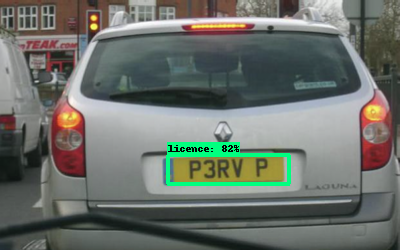


Plate Number: P3RV P


In [39]:
## ---- OBJECT DETECTION ----
# convert image data to numpy array
image_np = np.array(img)

# convert numpy array to tensor
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np,0), dtype='float32')
detections = detect_fn(input_tensor)

# from tensor to dictionary
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype('int64')

label_id_offset = 1
image_np_with_detections = image_np.copy()
category_index = label_map_util.create_category_index_from_labelmap(path+'annotations/label_map.pbtxt') # call the label map file

# plotting bounding box and its annotation
viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections, # test data
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5, # minimum accuracy score to be shown (here 50%)
            agnostic_mode=False)

# show the image with detected number plate
cv2_imshow(image_np_with_detections) # first output


## ---- CROP DETECTED OBJECT & DO OCR ----
# defining accuracy threshold
detection_th = .6

# finding some values
score = list(filter(lambda x: x > detection_th, detections['detection_scores'])) # to find the highest accuracy score
boxes = detections['detection_boxes'][:len(score)] # bounding box
classes = detections['detection_classes'][:len(score)]

# finding height & width of the image
height = image_np_with_detections.shape[0] 
width = image_np_with_detections.shape[1]

# crop the image
for box in boxes: # use looping just in case if there were more than 1 object detected
  roi = box*[height, width, height, width] # region of interest
  region = image_np_with_detections[int(roi[0]):int(roi[2]), int(roi[1]):int(roi[3])] # detected object obtained
  cv2_imshow(region) # show the detected object (cropped) // second output

  # text detection
  ocr_read = easyocr.Reader(['en'])
  ocr_result = ocr_read.readtext(region)


## ---- EXTRACT THE CLEANED TEXT (only number plate) ----
region_th = 0.4
def extract_text(region, ocr_result, region_th):
  rect_size = region.shape[0]*region.shape[1]

  result=[]
  for coord in ocr_result: # ocr_result is a 'list'
    x = sum(np.subtract(coord[0][1], coord[0][0])) # x-axis
    y = sum(np.subtract(coord[0][2], coord[0][1])) # y-axis

    if (x*y)/rect_size > region_th:
      result.append(coord[1])

  return result


# run the function
result = extract_text(region, ocr_result, region_th)
# show the OCR result
try:
  print(f'\nPlate Number: {result[0]}') # third output
except:
  pass